In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df1 = pd.read_csv('travel_times_50.csv', index_col = 0)
df2 = pd.read_csv('travel_times_80.csv', index_col = 0)
df = pd.concat([df1, df2], ignore_index=True)

In [9]:
df_stat = pd.DataFrame()
df_stat['avg'] = df.mean(axis = 1)
df_stat['std'] = df.std(axis = 1)
df_stat['md'] = df.median(axis = 1)
df_stat['min'] = df.min(axis = 1)
df_stat['max'] = df.max(axis = 1)
df_stat['CI'] = df_stat['std'] * 1.96 / len(df.columns)
df_stat['IQR'] = df.quantile(0.75, axis = 1) - df.quantile(0.25, axis = 1)
df_stat['3rdQ'] = df_stat['md'] + df_stat['IQR']
df_stat['1stQ'] = df_stat['md'] - df_stat['IQR']
df_stat['upper'] = df_stat['avg'] + df_stat['CI']
df_stat['lower'] = df_stat['avg'] - df_stat['CI']
# df_stat

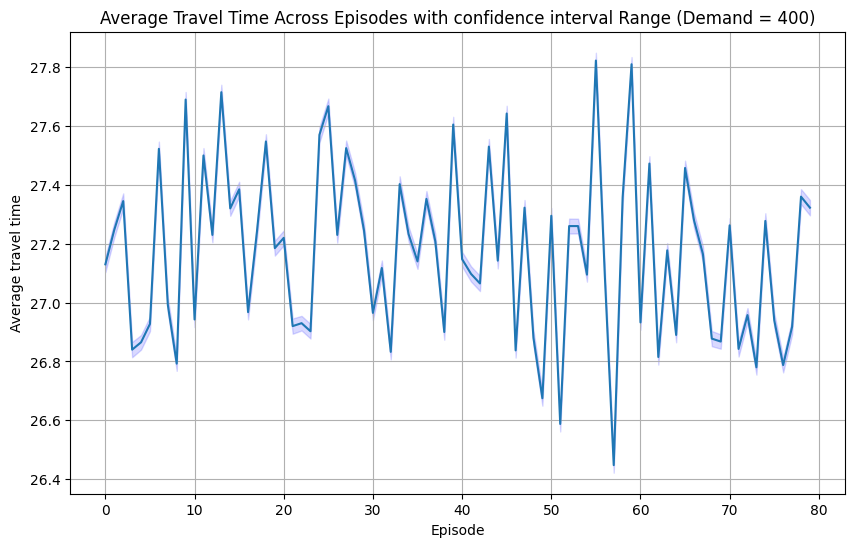

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
x = range(len(df))
ax.plot(x, df_stat['avg'])
# ax.plot(x, df_stat['md'])
ax.fill_between(
    x, df_stat['lower'], df_stat['upper'], color='b', alpha=.15)

ax.set_title('Average Travel Time Across Episodes with confidence interval Range (Demand = 400)')
ax.grid()
plt.xlabel('Episode')
plt.ylabel('Average travel time')
plt.savefig('AvgTT400.png')

In [20]:
df_r = pd.read_csv('reward_80.csv')

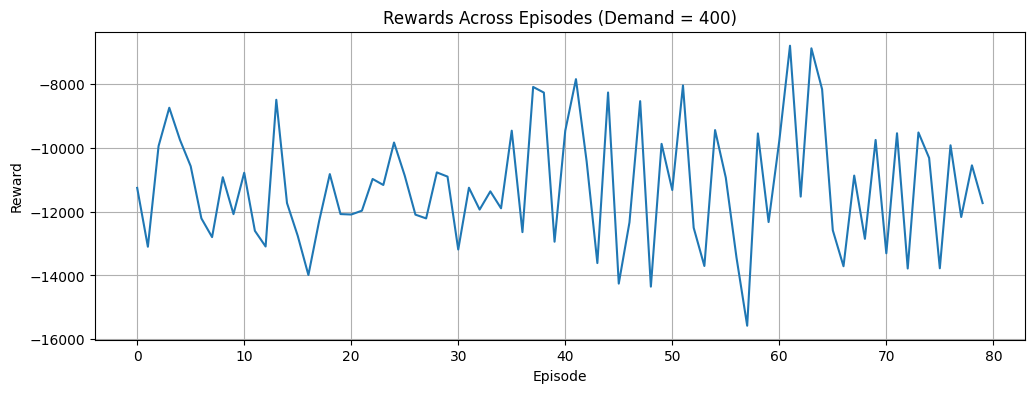

In [23]:
fig, ax = plt.subplots(figsize=(12,4))
x = range(len(df_r))
ax.plot(x, df_r['0'])
ax.set_title('Rewards Across Episodes (Demand = 400)')
ax.grid()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.savefig('Rewards400.png')